# Assignment

## Car Moving at Constant Speed (inference vs ML)

Consider a car moving at a constant speed. We have recorded data for the **time** (x-axis) and the corresponding **distance traveled** (y-axis). The goal is to model this relationship and interpret the physical meaning of the parameters.

1. **Use NumPy's `polyfit` to perform linear regression**
   Fit a line to the data using `numpy.polyfit` and extract: The slope (which represents the car’s speed), and the intercept (which represents the car’s starting position)

2. **Use scikit-learn's Linear Regression model**
   * Split the dataset into **training** and **validation** sets.
   * Fit a linear regression model using the training set.
   * Evaluate the model on the validation set.
   * Extract and compare the **slope** and **intercept** from this model.

3. **Compare with classroom results**
   * What's the distance for $t=276$ s? Discuss why the results may differ from those obtained in last class. What are the differences in the datasets?

4. Compare the predictions of the **scikit-learn linear regression model** with those from the **`polyfit` method**. Compute the following **quantitative error metrics** and use them to assess how closely the scikit-learn model approximates the original trend.:
  * Mean Absolute Error (MAE)
  * Mean Squared Error (MSE)
  * Root Mean Squared Error (RMSE)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
!pip install --upgrade --force-reinstall pandas scikit-learn


  Using cached pandas-2.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached scikit_learn-1.7.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.16.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached pandas-2.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
Using cached scikit_learn-1.7.1-cp312-cp312-manylinux2014_x86_64.manyli

In [16]:
time = np.arange(101)
distance_error = np.random.uniform(low=-100, high=100, size=time.shape)  # per-point noise
distance = 22*time + 25 + distance_error

In [17]:
print(time)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


In [18]:
# lin. fit
slope, intercept = np.polyfit(time, distance, 1)
print(f"Polyfit -> Slope: {slope:.2f}, Intercept: {intercept:.2f}")# Assignment

Polyfit -> Slope: 21.66, Intercept: 47.59


In [27]:
t=276
print(f"Position at t={t:.2f}s: {slope*t+intercept:.2f} meters")

Position at t=276.00s: 6024.96 meters


In [29]:
# Split and train
time_reshaped = time.reshape(-1, 1)
time_train, time_test, distance_train, distance_test = train_test_split(
    time_reshaped, distance, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(time_train, distance_train)

# Predict distance at t=276s
t = 276
prediction_t = model.predict([[t]])
predicted_distances = model.predict(time_reshaped)

print(f"Position at t={t:.2f}s: {prediction_t[0]:.2f} meters")


Position at t=276.00s: 6027.14 meters


In [20]:
slope_skl = model.coef_[0]
intercept_skl = model.intercept_
print(f"Scikit-learn -> Slope: {slope:.2f}, Intercept: {intercept:.2f}")

Scikit-learn -> Slope: 21.66, Intercept: 47.59


In [30]:
prediction_t = model.predict([[t]])[0]
print(f"Scikit-learn -> Position at t={t:.2f}s: {prediction_t:.2f} meters")

Scikit-learn -> Position at t=276.00s: 6027.14 meters


In [35]:
redicted_distances_polyfit = slope*time + intercept
predicted_distances_skl = model.predict(time_reshaped)

predicted_distances_polyfit = slope*time.flatten() + intercept


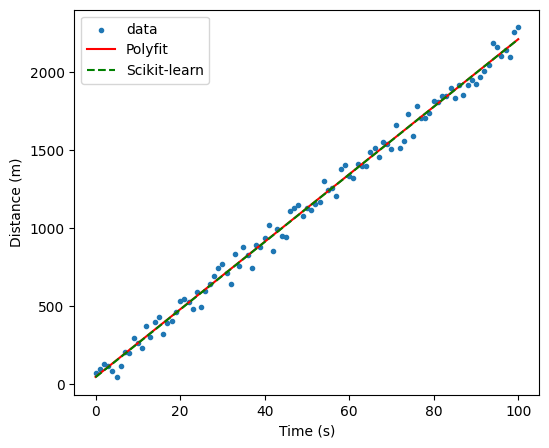

In [36]:
plt.figure(figsize=(6, 5))
plt.scatter(time, distance, marker=".", label="data")
plt.plot(time, predicted_distances_polyfit, c='r', label="Polyfit")
plt.plot(time, predicted_distances_skl, c='g', ls="--", label="Scikit-learn")
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.legend()
plt.show()

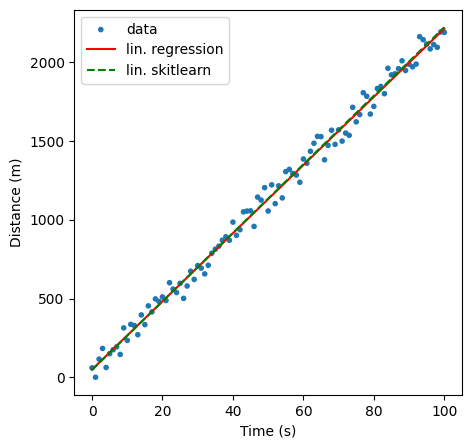

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(time, distance, marker=".", ls="", label="data")
plt.plot(time, slope*time+intercept, ls="-", c='r', label="lin. regression")
plt.plot(time, predicted_distances, ls="--", c='g', label="lin. skitlearn")
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.legend()
plt.show()

In [37]:
mae = mean_absolute_error(distance, predicted_distances_skl)
mse = mean_squared_error(distance, predicted_distances_skl)
rmse = np.sqrt(mse)

print(f"Errores (Scikit-learn vs datos):")
print(f"  MAE  = {mae:.2f}")
print(f"  MSE  = {mse:.2f}")
print(f"  RMSE = {rmse:.2f}")

Errores (Scikit-learn vs datos):
  MAE  = 43.54
  MSE  = 2746.89
  RMSE = 52.41


La comparacion entre el modelo de regresion lineal (scikit-learn) y los datos evidencia que el modelo logra capturar la tendencia general, pero presenta variaciones muy notables debido al ruido que se introdujo en los datos y tambien por el hecho de que se entreno sobre un subconjunto (datos de prueba) en lugar de usar todos los datos, como si lo hace el metodo polyfit

Las métricas de error cuantifican estas diferencias:

MAE = 43.54 en promedio, las predicciones del modelo difieren de los valores reales en unos 43,5 metros.

MSE = 2746.89  al elevar los errores al cuadrado, se evidencia que existen desviaciones considerables en algunos puntos.

RMSE = 52.41  el error típico de predicción es de aproximadamente ±52 metros respecto a los valores reales.

El metodo numpy.polyfit utiliza en este casi todos los datos y por eso, se ajusta a los valores abservados incluyendo el ruido, Eso explica por que las predicciones de scikit-learn no coinciden con las de polyfit aunque presentan adecuadamente la tendencia del problema o fenomeno trabajado.

In [47]:
print(f"Position at t={t:.2f}s: {slope*t+intercept:.2f} meters ---> linear fit")
print(f"Position at t={t:.2f}s: {prediction_t:.2f} meters ---> linear model skitlearn")

Position at t=276.00s: 6024.96 meters ---> linear fit
Position at t=276.00s: 6027.14 meters ---> linear model skitlearn


## 2. Profit Model (inference vs ML)
The profit from a certain stock trading strategy depends on how far the stock price $x$ moves away from a target price $K$. The profit can be modeled as:
$$
y = -a (x - K)^2 + b
$$
where $a > 0$ controls how quickly profit decreases away from $K$, and $b$ is the maximum profit at $x = K$.

In simple words, the profit is highest when the stock price equals $K$, and it decreases quadratically as the price moves away.

As the previous exercise
1. **Use NumPy's `polyfit` to perform a polynomial regression**
2. **Use scikit-learn's Linear Regression model**
   * Consider defining the feature $x^2$
   * Split the dataset into **training** and **validation** sets.
   * Fit a linear regression model using the training set.
   * Evaluate the model on the validation set.

3. Compare the predictions of the **scikit-learn linear regression model** with those from the **`polyfit` method**. Compute the following **quantitative error metrics** and use them to assess how closely the scikit-learn model approximates the original trend.:
  * Mean Absolute Error (MAE)
  * Mean Squared Error (MSE)
  * Root Mean Squared Error (RMSE)

In [48]:
# import basic packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [49]:
# define model
def profit_model(x,a,K,b):
    return -a * (x-K)**2 + b

# define model parameters
a = 0.6
K = 2.5
b = 1.5

# define data arrays
x = np.linspace(0,25,100)
y = profit_model(x,a,K,b)

# Let us add some noise to the data (per-point noise)
np.random.seed(0)
noise = np.random.uniform(low=-0.5, high=0.5, size=x.shape)
y = y + noise

# add noise to y
# complete the code

In [71]:
# Perform a fit using polyfit
coefficients = np.polyfit(x,y,2)
print("Fit Coefficients:", coefficients)



# Create polynomial function to plot the results
p = np.poly1d(coefficients)

Fit Coefficients: [-0.59952415  2.97809909 -2.10308016]


In [72]:
y_pred_polyfit = p(x)

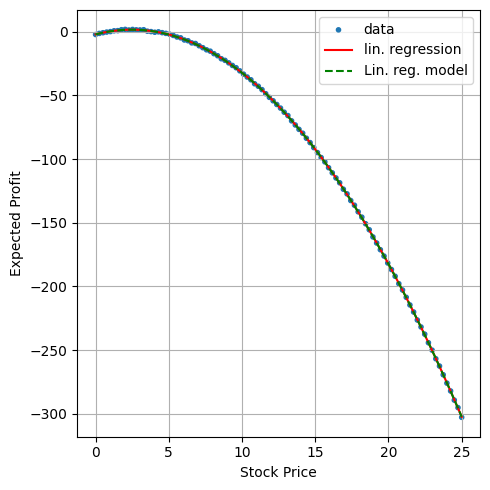

In [73]:
# Apply scikit-learn’s Linear Regression using a Feature transformation: add x^2
X = np.column_stack((x, x**2))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Full prediction for plotting
y_pred_full = model.predict(X)# complete the code

# Plot
plt.figure(figsize=(5, 5))
plt.scatter(x, y, marker=".", ls="", label="data")
plt.plot(x, p(x), ls="-", c='r', label="lin. regression")
plt.plot(x, y_pred_full, ls='--', color="g", label="Lin. reg. model")
plt.xlabel("Stock Price")
plt.ylabel("Expected Profit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [74]:
mae_polyfit = mean_absolute_error(y, y_pred_polyfit)
mse_polyfit = mean_squared_error(y, y_pred_polyfit)
rmse_polyfit = np.sqrt(mse_polyfit)


In [75]:
print("\nErrores con Polyfit:")
print(f" MAE = {mae_polyfit:.4f}")
print(f" MSE = {mse_polyfit:.4f}")
print(f" RMSE = {rmse_polyfit:.4f}")


Errores con Polyfit:
 MAE = 0.2376
 MSE = 0.0773
 RMSE = 0.2780


In [57]:
mae_sklearn = mean_absolute_error(y, y_pred_full)
mse_sklearn = mean_squared_error(y, y_pred_full)
rmse_sklearn = np.sqrt(mse_sklearn)


In [59]:
print("\nErrores con Scikit-learn:")
print(f" MAE = {mae_sklearn:.4f}")
print(f" MSE = {mse_sklearn:.4f}")
print(f" RMSE = {rmse_sklearn:.4f}")


Errores con Scikit-learn:
 MAE = 0.2375
 MSE = 0.0776
 RMSE = 0.2785


En este caso, mediante el calculo de los errores entre el metodo de scikit-learn y polyfit, podemos observar que en este caso ambos no difieren mucho en su desempeño, polyfit es mas directo para ajustar polinomios en cambio scikit-learn es mas flexible con distintos modelos.

# 3. Decision trees

**Reminder 1:** A __decision tree__ is a __supervised learning algorithm__ used for both classification and regression. Mathematically, it can be understood as a process of recursively splitting the feature space to minimize some impurity metric (like Gini impurity, entropy, or variance).

A **decision tree** partitions the feature space recursively:
At each **node**, choose:

- A **feature**  
- A **threshold**

to **split** the data in **Left** and **Right**

**Remember 2**
__The fundamental steps of building a supervised model are the following:__

- Arrange the data into features and target arrays.
- Split them into a training set and a test set.
- Select the ML algorithm you want to use, and its parameters.
- Build the model by applying the selected algorithm to the training set, which will create a tentative (implicit) input-output relationship. - Apply the model to the features of the test data to predict the target property of the test data. If you are using sklearn , this corresponds to applying the ".predict" method.
- Estimate the performance of your model by using an appropriate evaluation metric to compare the predicted and true target property of the test data.
- Rejoice (unlikely), or figure out what is not working out and repeat (likely).

# Exploring Habitable Planets with Decision Trees

We will apply machine learning—specifically, **decision trees**—to classify **exoplanets** as potentially habitable or not using a small dataset inspired by the **Planet Habitability Lab**.

Let us dive into the fascinating question:

> “Are we alone in the universe?”

The search for intelligent life beyond Earth is a profound scientific question.   With missions like Kepler and TESS discovering thousands of exoplanets, our focus is now on identifying **habitable planets** — those with conditions potentially compatible with life.

We will use a small dataset from the Planet Habitability Lab to build a **machine learning model** to classify planets as habitable or not, leveraging **decision trees** — which is a intuitive and powerful classification method.

## Dataset: Planet Habitability Lab Sample

Our dataset consists of 18 planets with the following features:

- **Stellar Mass**: Mass of the parent star (in solar masses)
- **Orbital Period**: How long the planet takes to orbit its star (in days)
- **Distance (AU)**: Distance between the planet and its star (astronomical units)
- **Habitable?**: Target variable (1 = habitable, 0 = not habitable)

Below is the data we'll use

In [78]:
import pandas as pd

data = {
    "Name": [
        "Kepler-736 b", "Kepler-636 b", "Kepler-887 c", "Kepler-442 b", "Kepler-772 b",
        "Teegarden’s Star b", "K2-116 b", "GJ 1061 c", "HD 68402 b", "Kepler-1544 b",
        "Kepler-296 e", "Kepler-705 b", "Kepler-445 c", "HD 104067 b", "GJ 4276 b",
        "Kepler-296 f", "Kepler-63 b", "GJ 3293 d"
    ],
    "Stellar Mass": [0.86, 0.85, 1.19, 0.61, 0.98, 0.09, 0.69, 0.12, 1.12, 0.81, 0.5, 0.53, 0.18, 0.62, 0.41, 0.5, 0.98, 0.42],
    "Orbital Period": [3.60, 16.08, 7.64, 112.30, 12.99, 4.91, 4.66, 6.69, 1103.00, 168.81, 34.14, 56.06, 4.87, 55.81, 13.35, 63.34, 9.43, 48.13],
    "Distance (AU)": [0.0437, 0.1180, 0.0804, 0.4093, 0.1074, 0.0252, 0.0481, 0.0350, 2.1810, 0.5571, 0.1782, 0.2319, 0.0317, 0.2600, 0.0876, 0.2689, 0.0881, 0.1953],
    "Habitable?": [0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1]
}

df = pd.DataFrame(data)
df.head()


,Name,Stellar Mass,Orbital Period,Distance (AU),Habitable?
0,Kepler-736 b,0.86,3.60,0.0437,0
1,Kepler-636 b,0.85,16.08,0.1180,0
2,Kepler-887 c,1.19,7.64,0.0804,0
3,Kepler-442 b,0.61,112.30,0.4093,1
4,Kepler-772 b,0.98,12.99,0.1074,0


## Preliminary Exploration

Explore the feature of our data better before modeling.

- Dataset size (samples & features)
- Check for missing values
- Understand feature ranges and spot outliers
- Check balance of classes (habitable vs not)

In [79]:

print(f"Dataset shape: {df.shape[0]} samples, {df.shape[1]-2} features (excluding 'Name' and target)")

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nClass distribution:")
print(df['Habitable?'].value_counts())

print("\nFeature statistics:")
print(df[["Stellar Mass", "Orbital Period", "Distance (AU)"]].describe())


Dataset shape: 18 samples, 3 features (excluding 'Name' and target)

Missing values per column:
Name              0
Stellar Mass      0
Orbital Period    0
Distance (AU)     0
Habitable?        0
dtype: int64

Class distribution:
Habitable?
0    10
1     8
Name: count, dtype: int64

Feature statistics:
       Stellar Mass  Orbital Period  Distance (AU)
count     18.000000       18.000000      18.000000
mean       0.636667       95.878333       0.274828
std        0.327755      255.167865       0.496644
min        0.090000        3.600000       0.025200
25%        0.440000        6.927500       0.056175
50%        0.615000       14.715000       0.112700
75%        0.857500       55.997500       0.252975
max        1.190000     1103.000000       2.181000


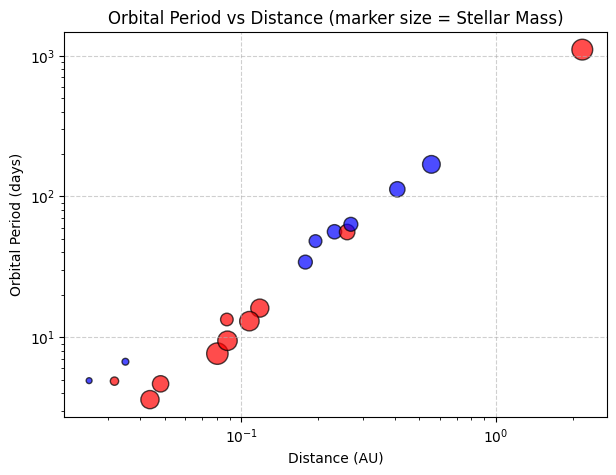

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

colors = df["Habitable?"].map({1: "blue", 0: "red"})  # azul habitable, rojo no
sizes = df["Stellar Mass"] * 200  # escala para que se vean mejor

plt.scatter(df["Distance (AU)"], df["Orbital Period"],
            s=sizes, c=colors, alpha=0.7, edgecolors="k")

plt.xscale("log")
plt.yscale("log")


plt.xlabel("Distance (AU)")
plt.ylabel("Orbital Period (days)")
plt.title("Orbital Period vs Distance (marker size = Stellar Mass)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Expected result:

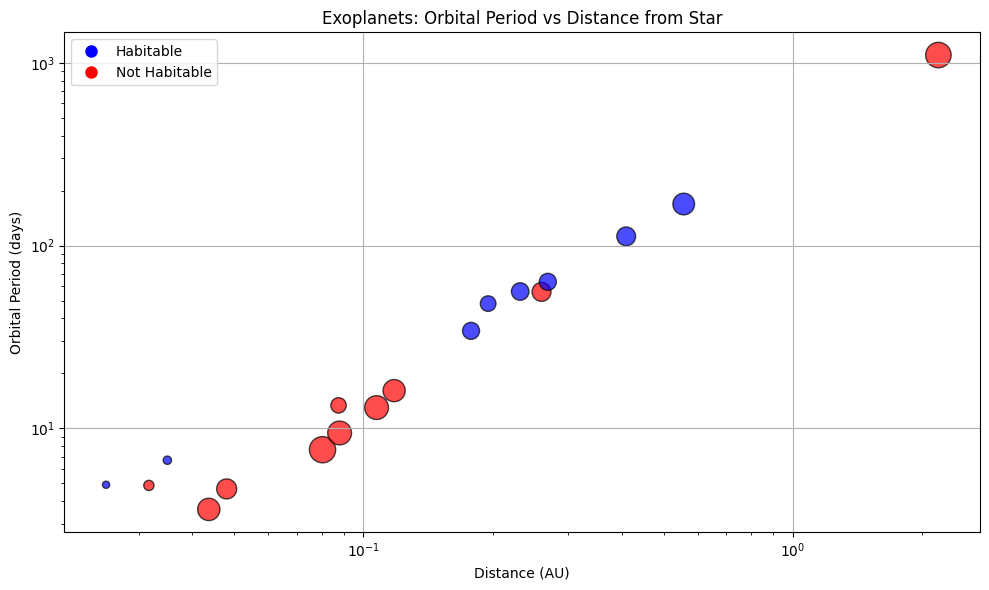

## Feature Distribution and Outliers

Visualize the distributions of features and their relationship with habitability. We look for:
- Outliers (e.g., extremely large orbital period)
- How features differ between habitable and non-habitable classes

/tmp/ipython-input-546620108.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([hab_0, hab_1], labels=["0 (No)", "1 (Yes)"])


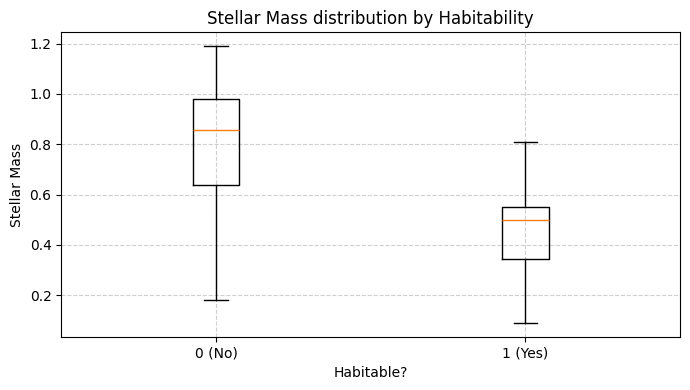

/tmp/ipython-input-546620108.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([hab_0, hab_1], labels=["0 (No)", "1 (Yes)"])


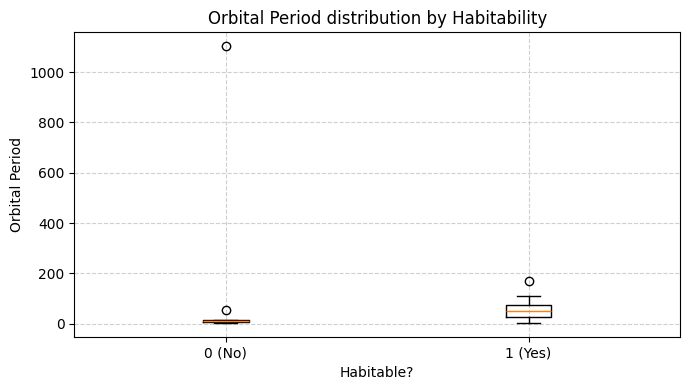

/tmp/ipython-input-546620108.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([hab_0, hab_1], labels=["0 (No)", "1 (Yes)"])


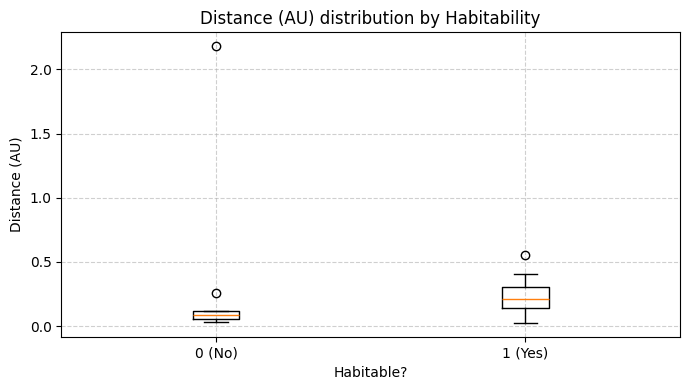

In [97]:
import matplotlib.pyplot as plt

features = ["Stellar Mass", "Orbital Period", "Distance (AU)"]

for feature in features:
    plt.figure(figsize=(7, 4))

    # Split the data by habitability
    hab_0 = df[df["Habitable?"] == 0][feature]
    hab_1 = df[df["Habitable?"] == 1][feature]
    # Create boxplot
    plt.boxplot([hab_0, hab_1], labels=["0 (No)", "1 (Yes)"])

    # Customize plot
    plt.title(f"{feature} distribution by Habitability")
    plt.xlabel("Habitable?")
    plt.ylabel(feature)

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

## Train/Test Split

We'll use the first 13 samples as training data and the last 5 as test data for reproducibility. In real projects, random splitting or cross-validation is better!

In [84]:
train_df = df.iloc[:13]
test_df = df.iloc[13:]

X_train = train_df[["Stellar Mass", "Orbital Period", "Distance (AU)"]]
y_train = train_df["Habitable?"]

X_test = test_df[["Stellar Mass", "Orbital Period", "Distance (AU)"]]
y_test = test_df["Habitable?"]

## Training a Decision Tree Classifier

Build a decision tree to classify planets based on the three features.

In [85]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Evaluate Performance

Check how well our model predicts habitability on the test set. Remember that

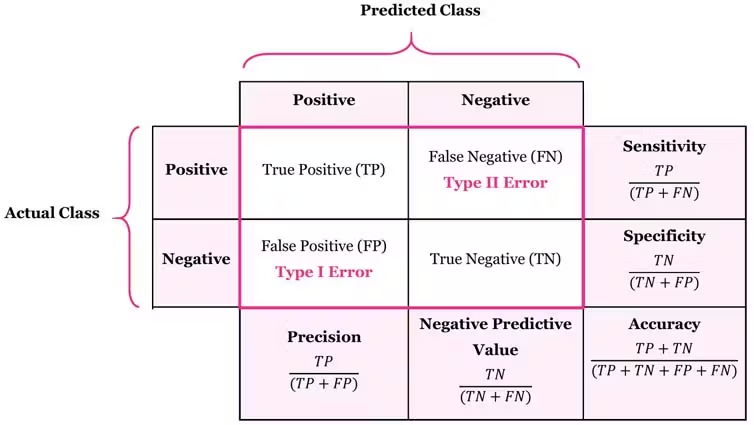

In [88]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1 2]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



## Visualizing the Decision Tree

Understanding the splits the decision tree makes helps us interpret the model.

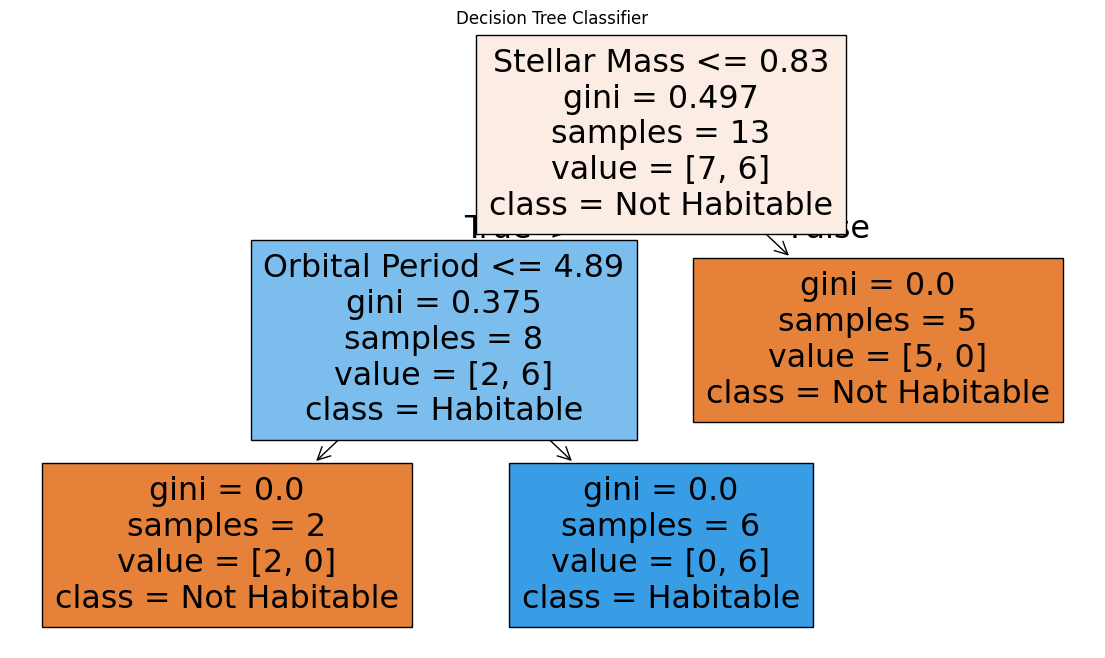

In [95]:
from sklearn.tree import plot_tree

plt.figure(figsize=(14, 8))
plot_tree(clf, feature_names=["Stellar Mass", "Orbital Period", "Distance (AU)"],
                class_names = ["Not Habitable", "Habitable"], filled = True)  # complete the code
plt.title("Decision Tree Classifier")
plt.show()


# 4. Decision Tree applications

## 4.1 Overfitting
What is overfitting in decision trees, and how can it be prevented?

El sobreajuste ocurre cuando un arbol de decision se ajusta mucho a los datos de entrenamiento, incluyendo el ruido o las variaciones aleatorias, esto implica que el modelo tendra un bien rendimiento en los datos de entrenamiento pero va a fallar cuando le pongan otros datos completamente nuevos, en pocas palabras en un ejemplo de la vida cotidiana que les suele ocurrir a los estudiantes cuando se acostumbran a unas variables y fallan cuando les presentan otras.  

Se puede prevenir utilizando técnicas como:


1. Limitar la profundidad máxima del árbol.

2. Definir un número mínimo de muestras por nodo o por hoja.

3. Aplicar poda (eliminar ramas irrelevantes).

4. Usar técnicas de validación cruzada para encontrar los mejores hiperparámetros.

## 4.2 Decision tree pruning
Which of the following best describes the purpose of pruning in a decision tree?

**C.** To reduce overfitting by removing branches that have little predictive power

